<a href="https://colab.research.google.com/github/milanpavikevik/Skin-Lesion-Classification/blob/main/Skin_Types_FastAI_80_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import copy

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from fastai.vision import *

In [4]:
path = '/content/drive/MyDrive/Skin-Lesion'
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms,size=128, num_workers=4).normalize(imagenet_stats)

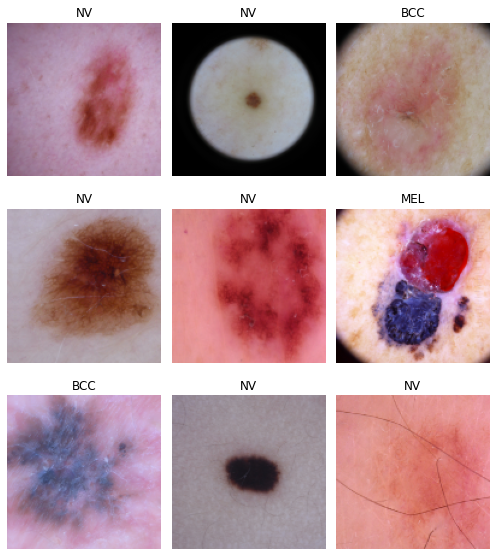

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.c, data.classes

(8, ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC'])

In [7]:
print(data)

ImageDataBunch;

Train: LabelList (20272 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
VASC,VASC,VASC,VASC,VASC
Path: /content/drive/MyDrive/Skin-Lesion;

Valid: LabelList (5067 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
MEL,BKL,NV,MEL,BKL
Path: /content/drive/MyDrive/Skin-Lesion;

Test: None


In [8]:
arch = models.resnet50

In [9]:
learn = cnn_learner(data, arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

We use the LR Finder to pick a good learning rate.

In [10]:

learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


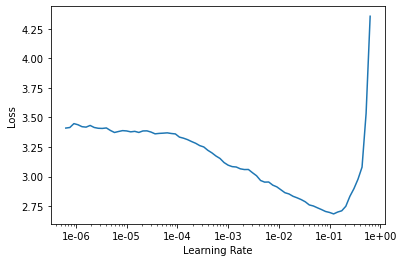

In [11]:
learn.recorder.plot()

In [10]:

lr = 0.015

Then we can fit the head of our network.

In [11]:

learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.186309,1.052060,0.638247,43:40
1,0.903704,0.821782,0.704362,40:49
2,0.825909,0.786448,0.712453,42:15
3,0.733492,0.695188,0.744622,42:34


epoch,train_loss,valid_loss,accuracy,time
0,1.186309,1.052060,0.638247,43:40
1,0.903704,0.821782,0.704362,40:49
2,0.825909,0.786448,0.712453,42:15
3,0.733492,0.695188,0.744622,42:34
4,0.677922,0.678638,0.750937,43:02


In [12]:
learn.save('/content/stage-1-rn50')

..And fine-tune the whole model:

In [13]:

learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


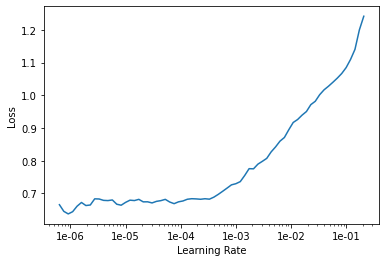

In [14]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(6, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.722978,0.710165,0.739293,54:52
1,0.740996,0.726573,0.734557,54:39


epoch,train_loss,valid_loss,accuracy,time
0,0.722978,0.710165,0.739293,54:52
1,0.740996,0.726573,0.734557,54:39
2,0.659629,0.673458,0.756858,55:34
3,0.573872,0.596775,0.778370,55:41
4,0.442577,0.536545,0.805802,56:55
5,0.373513,0.530896,0.808170,55:07


In [17]:
learn.save('/content/stage-2-rn50')
from google.colab import files
files.download('/content/stage-2-rn50.pth') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
malig=0
bening = 0
preds,targs = learn.get_preds()
for pred,targ in zip(preds,targs):
  print(pred,targ)
  output = learn.predict(test)
  print(output)
  if any is maligant:
    plusplus+=1
  else:
    minusmin+1

tensor([6.5530e-02, 5.4418e-03, 9.1342e-01, 7.5335e-05, 7.9640e-03, 6.8558e-03,
        6.9320e-04, 1.6536e-05]) tensor(4)


AttributeError: ignored

NAPRAJ MALIGANT/benigan 